In [1]:
from icecube import icetray, dataclasses, dataio
from I3Tray import *
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FixedFormatter, LogLocator

In [3]:
datapath = '/data/p-one/llallement/dimuon_generator/NuDimuonGenerator/i3_weighted_files/'

In [5]:
# extract data from I3MCWeightDict into lists

one_weight = []
nu_energy = []
cross_section = []

def get_mc_weight(frame):
    global one_weight
    global nu_energy
    global cross_section
    
    obj = frame['I3MCWeightDict']
    
    one_weight.append(obj['OneWeight'])
    nu_energy.append(obj['PrimaryEnergy'])
    cross_section.append(obj['TotalCrossection'])
    
    return None

In [6]:
# extract data from CharmWeightDict into lists

c_fraction = []
muon_br = []
h_energy = []

def get_charm_weight(frame):
    global c_fraction
    global muon_br
    global h_energy
    
    obj = frame['CharmWeightDict']
    
    c_fraction.append(obj['CharmQuarkFraction'])
    muon_br.append(obj['MuonBR'])
    h_energy.append(obj['CharmHadronEnergy'])

In [5]:
# run the icetray to extract data from all the files

for i in range(1, 101):
    random_seed = 110000 + i
    data_file = datapath + str(random_seed) + '_weightedOutput.i3.gz'

    tray = I3Tray() # start the 'tray'
    tray.AddModule('I3Reader', 'reader', Filename=data_file) # read the file
    tray.AddModule(get_mc_weight, 'mc_weight', Streams=[icetray.I3Frame.DAQ])
    # use the get_mc_weight function
    tray.AddModule(get_charm_weight, 'charm_weight', Streams=[icetray.I3Frame.DAQ])
    # use the get_charm_weight function
    tray.Execute()
    tray.Finish() # execute and finish the tray

In [7]:
'''nu_energy_small = []
one_weight_small = []

for i in range(0, len(nu_energy)):
    #if 1.2 <= np.log10(nu_energy[i]) <= 2.2:
    if 0 <= one_weight[i] <= 0.1:
            nu_energy_small.append(nu_energy[i])
            one_weight_small.append(one_weight[i])'''

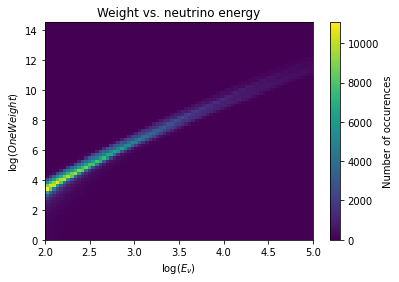

In [8]:
# 2D distribution pf neutrino energy and OneWeight

offset = 1e-6

nu_energy_offset = np.array(nu_energy) + offset
one_weight_offset = np.array(one_weight) + offset

plt.hist2d(np.log10(nu_energy_offset), np.log10(one_weight_offset), bins=100)
plt.xlim(2, 5)
plt.ylim(0, 14.5)
plt.xlabel(r'log($E_\nu$)')
plt.ylabel(r'log($OneWeight$)')
plt.title('Weight vs. neutrino energy')
plt.colorbar(label='Number of occurences')
plt.show();

In [7]:
# run the icetray for a smaller number of files (scatter plots)
# you may have to restart the kernel before running it again

for i in range(1, 3):
    random_seed = 110000 + i
    data_file = datapath + str(random_seed) + '_weightedOutput.i3.gz'

    tray = I3Tray()
    tray.AddModule('I3Reader', 'reader', Filename=data_file)
    tray.AddModule(get_mc_weight, 'mc_weight', Streams=[icetray.I3Frame.DAQ])
    tray.AddModule(get_charm_weight, 'charm_weight', Streams=[icetray.I3Frame.DAQ])
    tray.Execute()
    tray.Finish()

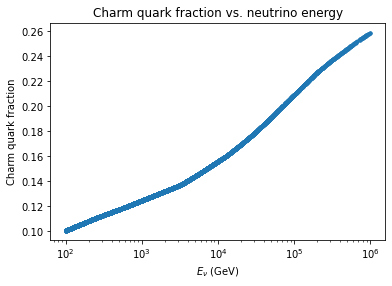

In [9]:
# charm quark fraction vs. neutrino energy

plt.scatter(nu_energy, c_fraction, marker='.')
plt.xscale('log')
plt.xlabel(r'$E_\nu$ (GeV)')
plt.ylabel('Charm quark fraction')
plt.title('Charm quark fraction vs. neutrino energy')
plt.show;

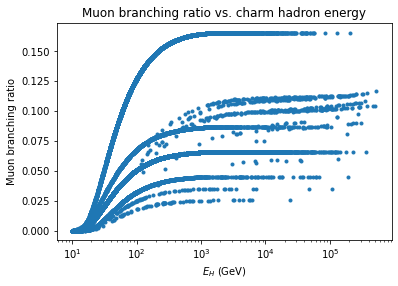

In [10]:
# muon branching ratio vs. charm hadron energy

plt.scatter(h_energy, muon_br, marker='.')
plt.xscale('log')
plt.xlabel(r'$E_H$ (GeV)')
plt.ylabel('Muon branching ratio')
plt.title('Muon branching ratio vs. charm hadron energy')
plt.show;

In [13]:
# remove zero cross section values to plot it in log scale

cross_section = np.array(cross_section)
nu_energy = np.array(nu_energy)

non_zero_indices = np.where(cross_section > 1e-39)

filtered_cross_section = cross_section[non_zero_indices]
filtered_nu_energy = nu_energy[non_zero_indices]

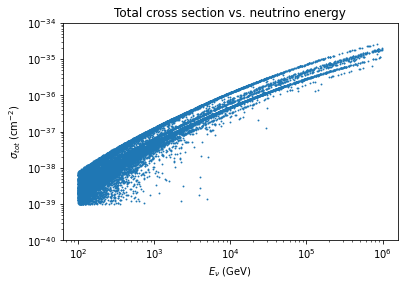

In [14]:
# total cross section vs. neutrino energy

plt.scatter(filtered_nu_energy, filtered_cross_section, marker='.', s=3)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-40, 1e-34)
plt.xlabel(r'$E_\nu$ (GeV)')
plt.ylabel(r'$\sigma_{tot}$ (cm$^{-2}$)')
plt.title('Total cross section vs. neutrino energy')
plt.show;